In [42]:
import numpy as np
import cv2

In [43]:
cat_cascade = cv2.CascadeClassifier('haarcascade_frontalcatface.xml')
cat_ext_cascade = cv2.CascadeClassifier('haarcascade_frontalcatface_extended.xml')

In [62]:
SF=1.05  # try different values of scale factor like 1.05, 1.3, etc
N=8 # try different values of minimum neighbours like 3,4,5,6

In [68]:
def processImage(image_dir,image_filename):
    # read the image
    img = cv2.imread(image_dir+'/'+image_filename)
    # convery to gray scale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # this function returns tuple rectangle starting coordinates x,y, width, height
    cats = cat_cascade.detectMultiScale(gray, scaleFactor=SF, minNeighbors=N)
    #print(cats) # one sample value is [[268 147 234 234]]
    cats_ext = cat_ext_cascade.detectMultiScale(gray, scaleFactor=SF, minNeighbors=N)
    #print(cats_ext)
    
    # draw a blue rectangle on the image
    for (x,y,w,h) in cats:
        img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)       
    # draw a green rectangle on the image 
    for (x,y,w,h) in cats_ext:
        img = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
    
    # save the image to a file
    cv2.imwrite('out'+image_filename,img)

In [74]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import time

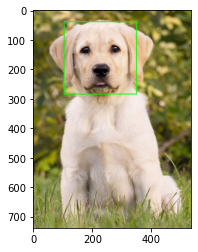

In [77]:
for idx in range(1,6):
    processImage('.','cat'+str(idx)+'.jpg')
    img = mpimg.imread('cat'+str(idx)+'.jpg')
    plt.imshow(img)
    time.sleep(10)
    img = mpimg.imread('outcat'+str(idx)+'.jpg')
    plt.imshow(img)

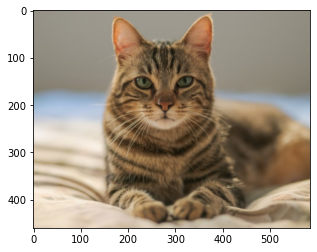

In [72]:
img = mpimg.imread('cat1.jpg')
plt.imshow(img)

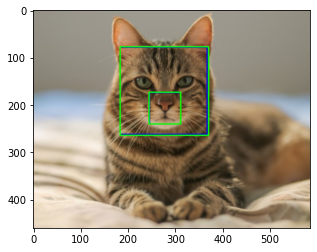

In [71]:
img = mpimg.imread('outcat1.jpg')
plt.imshow(img)